### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Import Library

In [117]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Load Data from newdataset**


In [118]:
# 讀取資料
file_path = "./newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(file_path)
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Data Prepration

印出資料有多少筆、以及有多少欄位


In [5]:
print(df.shape)
print(df.columns)

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


### **Query Data**
use iloc
print out the *text* data for the first three samples in the dataset. 

In [6]:
for i in range(3):
    print(f"Document example {i+1}:")
    print((df.iloc[i]["text"]))


Document example 1:
Calls on retards
Document example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Document example 3:
Seeing lots of red in the ticker.


Data Transformation(資料轉換):
    讓資料可以更加整齊容易觀察和分析，用Pandas轉匯成表格，但現在已經有csv檔案不用轉換成DataFrame

### **** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

印出index為2、3、4的post_id，注意iloc is half-open

In [7]:
df.iloc[2:5]['post_id']

2    mmeevio
3    165kllm
4    mmkl6bw
Name: post_id, dtype: object

In [8]:
df.duplicated('label')

0      False
1      False
2       True
3      False
4       True
       ...  
842     True
843     True
844     True
845     True
846     True
Length: 847, dtype: bool

印出有哪幾種類型的 **type**

In [9]:
print(df['type'].unique())

['comment' 'post']


#### Query data 選擇特定 column 的 data 
選擇 **type** is **comment** 每10筆取一筆，然後在印出前5列

In [10]:
df[df['type']=='comment'].iloc[::10,:].head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.90000,-1.0,[],-1.0
11,comment,2025-04-12 2:51:20,mmo9e6r,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,https://www.reddit.com/r/wallstreetbets/commen...,9,NaN,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.00000,1.0,"['sub', 'WSB', 'Best']",0.0
21,comment,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.000000,0.00000,0.0,"['GEO', 'WM']",0.0
31,comment,2024-08-17 5:32:56,liiwbkk,stockstobuytoday,Best EV / green mining stocks?,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.10788,1.0,"['Jeep', 'program', 'spike', '+', 'Honda', 'Eq...",0.0
41,comment,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.000000,0.00000,0.0,['plug'],0.0


### Missing value
用 **isnull()** 取缺失的data，如果缺失會回傳Boolean的array回傳True代表缺失的資料

印出那些column有缺失的資料，isnull會以每一column來看

In [11]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64



因為isnull預設是用 **每一欄** 看有沒有缺失資料，而把axis改成1後可以看 **每一列** 有沒有缺失資料，最後數字顯示這一列缺失多少筆欄位的資料

In [12]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### Duplicate Data

檢查是否有duplicate 用 duplicated()

In [13]:
df.duplicated().sum()

np.int64(0)

因為沒有duplicate data 所以自己新增一筆，用 **concat()**

In [14]:
# Add a row for duplicate testing
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

In [15]:
df.duplicated().sum()

np.int64(1)

把重複的data清除

In [16]:
print("before drop_dupliacate",df.shape)
df.drop_duplicates(inplace=True)
print("after drop_duplicate",df.shape)

before drop_dupliacate (848, 16)
after drop_duplicate (847, 16)


現在drop的data是看兩個col的val是完全相同才drop


In [17]:
df = df.drop_duplicates(subset=['text', 'label'])

### Data Preprocessing--Sampling

Sample 100筆 Data

In [18]:
X=df.sample(100)
X[:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
573,comment,2021-11-14 14:08:50,hkl7rir,stockstobuytoday,YOLO stocks thread. Reply with your ticker,BrodyFlint,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,I'm doing well with miner stocks. \r\n(AUY) Ya...,0.000000,0.000000,0.0,"['Group', 'AUY', 'Platinum', 'day', 'miner', '...",1.0
749,comment,2025-04-11 15:13:49,mmkqdz5,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,Secret_Cabinet2348,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,This guy is doing the ultimate fake it until y...,1.000000,-0.250000,-1.0,"['everyone', 'fake', 'guy', 'broke']",-1.0
678,comment,2025-04-11 13:12:18,mmk2woo,StockMarket,🚨China responds to Trump’s 145% tariff with an...,Dangerous_Bar6733,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,"Poor slave, thinking they're free and democrat...",0.400265,-0.014214,-1.0,"['master', 'dissatisfaction', 'Poor', 'slave',...",-1.0
530,comment,2025-04-11 15:50:52,mmky0hh,stocks,The US bond market is continuing to crash. Wil...,futurespacecadet,https://www.reddit.com/r/stocks/comments/1jwsz...,2,NaN,NaN,"moving onto QE, risk on, and then bitcoin pumps",0.000000,0.000000,0.0,"['risk', 'QE']",-1.0
581,comment,2025-04-12 1:45:08,mmnzb98,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Top-Cup-8198,https://www.reddit.com/r/wallstreetbets/commen...,12,NaN,NaN,Years ago I found Kate Rooney’s instagram.\r\n...,0.518452,-0.080357,-1.0,"['instagram', 'fact', 't', 'auto', 'Small', 's...",1.0


### Visualize

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

選擇一個column計算每個類別的val，最後繪製長條圖

In [21]:
X['subreddit'].unique()

array(['stockstobuytoday', 'StockMarket', 'stocks', 'wallstreetbets'],
      dtype=object)

In [22]:
print(X['subreddit'].value_counts())

subreddit
stocks              37
stockstobuytoday    22
StockMarket         22
wallstreetbets      19
Name: count, dtype: int64


畫出Sample後subreddit的各個val_counts

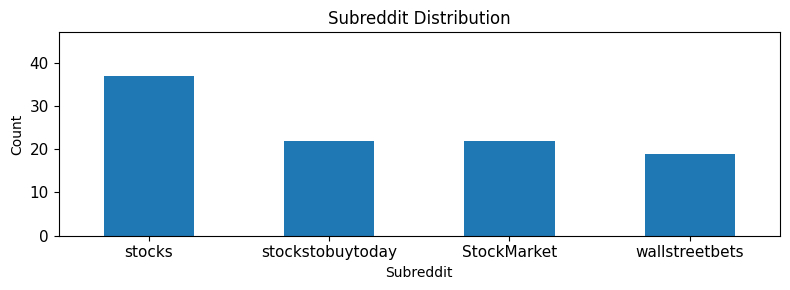

In [23]:
counts = X['subreddit'].value_counts()

counts.plot(
    kind='bar',
    title='Subreddit Distribution',
    ylim=(0, counts.max() + 10),  
    rot=0,
    fontsize=11,
    figsize=(8,3)
)

plt.xlabel("Subreddit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


這邊因為前面指定X and df的subreddit那幾欄位組成dataframe所以呼叫會自動把subreddit當成index，在plot會自動變成x軸類別

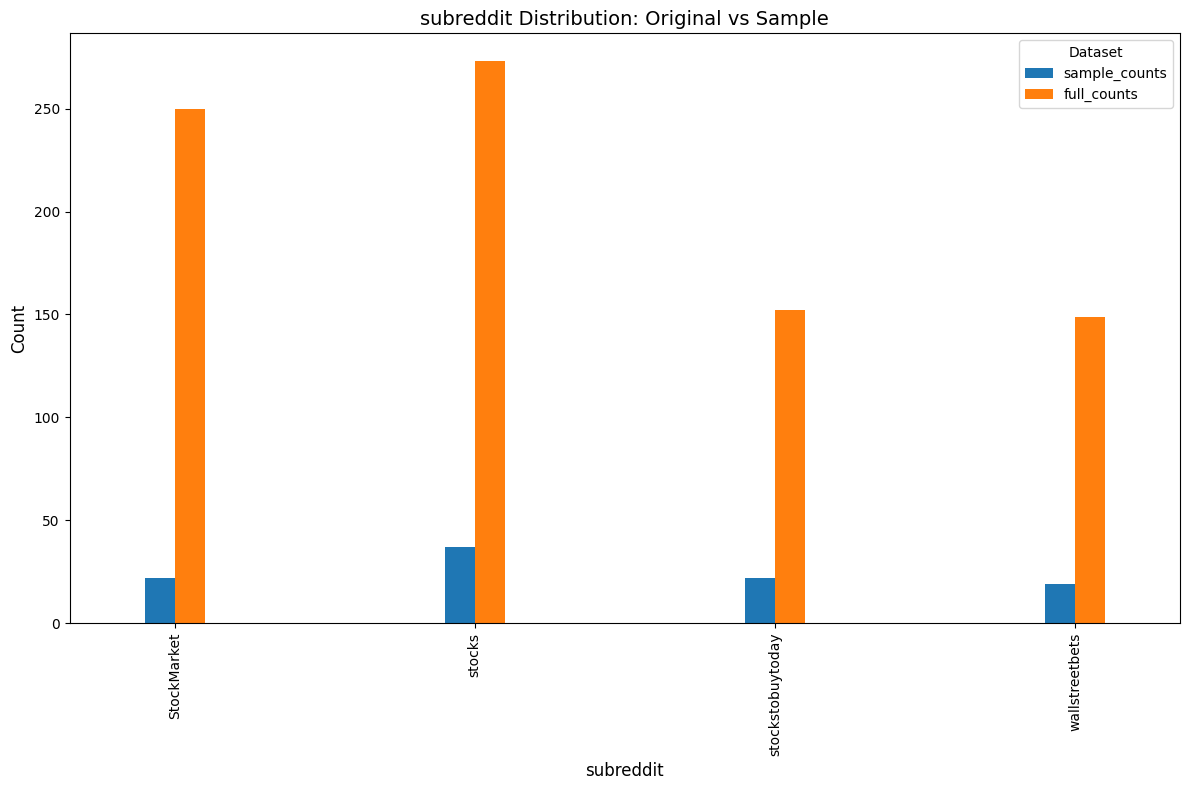

In [24]:
sampel_counts = X['subreddit'].value_counts()
counts = df['subreddit'].value_counts()
df_counts= pd.DataFrame({'sample_counts':sampel_counts, 'full_counts':counts})
ax = df_counts.plot(kind='bar',
                    figsize=(12,8),
                    width=0.2)
plt.title("subreddit Distribution: Original vs Sample", fontsize=14)
plt.xlabel("subreddit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

### Feature Creation
從現有資料創造出新的資訊欄位，幫助模型更好分析

In [25]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

把句子以單詞的方式切出每個部分

In [26]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [27]:
print(X.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'unigrams'],
      dtype='object')


In [28]:
print(X['unigrams'].head())

573    [I, 'm, doing, well, with, miner, stocks, ., (...
749    [This, guy, is, doing, the, ultimate, fake, it...
678    [Poor, slave, ,, thinking, they, 're, free, an...
530    [moving, onto, QE, ,, risk, on, ,, and, then, ...
581    [Years, ago, I, found, Kate, Rooney, ’, s, ins...
Name: unigrams, dtype: object


列出第一筆的unigrams

In [29]:
list(X[0:1]['unigrams'])

[['I',
  "'m",
  'doing',
  'well',
  'with',
  'miner',
  'stocks',
  '.',
  '(',
  'AUY',
  ')',
  'Yamana',
  'Gold',
  'Co',
  '&',
  '(',
  'PLG',
  ')',
  'Platinum',
  'Group',
  'Metals',
  'as',
  'a',
  'day',
  'trade',
  'stock']]

### Feature Subset Selection
主要要你從前面的文字資料中，建立 Document-Term Matrix (DTM)，並理解這是一種「特徵子集選取」的概念

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#fit_transform() does two things: 會學習有多少單詞，然後建立一個詞矩陣
X_counts = count_vect.fit_transform(X['text']) #learn the vocabulary and return document-term matrix

dtm_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
print(dtm_df)


    08  10  100  10000  11  13  140  15  150  153  ...  yet  yields  yikes  \
0    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
1    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
2    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
3    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
4    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
..  ..  ..  ...    ...  ..  ..  ...  ..  ...  ...  ...  ...     ...    ...   
95   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
96   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
97   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
98   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
99   0   0    0      0   0   0    0   0    0    0  ...    0       0      1   

    yippee  you  young  your  yours  yourself  zero  
0        

若我今天想要找某個詞是出現在哪篇文章，並且總共出現多少次

方法1:用for loop 慢慢遍歷每個DTM，效能會比較差

In [31]:
num = 0
for i in range(dtm_df.shape[0]):

    word = count_vect.get_feature_names_out()[900]
    if dtm_df.iloc[i][900]>0:
        print(f"Row {i} contains the word '{word}'")
        num+=1
print(f"count of rows that contain the word '{word}': {num}")
    

Row 37 contains the word 'reveal'
count of rows that contain the word 'reveal': 1


C:\Users\lala9\AppData\Local\Temp\ipykernel_29408\2158203469.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dtm_df.iloc[i][900]>0:


方法2:用Mask的方式直接用條件過濾

In [32]:
word = count_vect.get_feature_names_out()[-1]
mask = dtm_df[word] > 0  
print(dtm_df[mask])  

    08  10  100  10000  11  13  140  15  150  153  ...  yet  yields  yikes  \
48   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
89   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   

    yippee  you  young  your  yours  yourself  zero  
48       0    0      0     0      0         0     1  
89       1    1      0     0      0         0     1  

[2 rows x 1219 columns]


CountVectorizer 是如何將句子切成一個一個的單詞，利用analyzer，最後建立詞矩陣(TDM)

In [33]:
analyze = count_vect.build_analyzer()

In [34]:
analyze(X.iloc[0]['text'])

['doing',
 'well',
 'with',
 'miner',
 'stocks',
 'auy',
 'yamana',
 'gold',
 'co',
 'plg',
 'platinum',
 'group',
 'metals',
 'as',
 'day',
 'trade',
 'stock']

In [35]:
count_vect.get_feature_names_out()[0:10]

array(['08', '10', '100', '10000', '11', '13', '140', '15', '150', '153'],
      dtype=object)

In [37]:
plot_x = ["term_"+ str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [38]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [41]:
X.index

Index([573, 749, 678, 530, 581, 779, 756, 774, 645,  41, 718, 522, 490, 313,
       453, 616, 307, 601, 827, 180, 325, 642, 464, 425, 636, 183,   0, 555,
       578, 676, 316, 343, 443, 570, 605, 348, 269, 351, 404, 724,  85, 821,
       196, 155, 656, 702, 261, 817, 372,  90, 730, 771, 716, 384, 791, 475,
       494, 551,  60, 437, 126, 696, 177,  55,  72, 449,  89, 178, 390, 614,
       416, 543, 140,  96, 102, 701, 300, 324, 467, 526, 466, 674,  95, 483,
       560, 723, 598, 617, 575, 327, 395, 440,  87,  82,  70, 773, 499, 785,
        65, 118],
      dtype='int64')

In [39]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

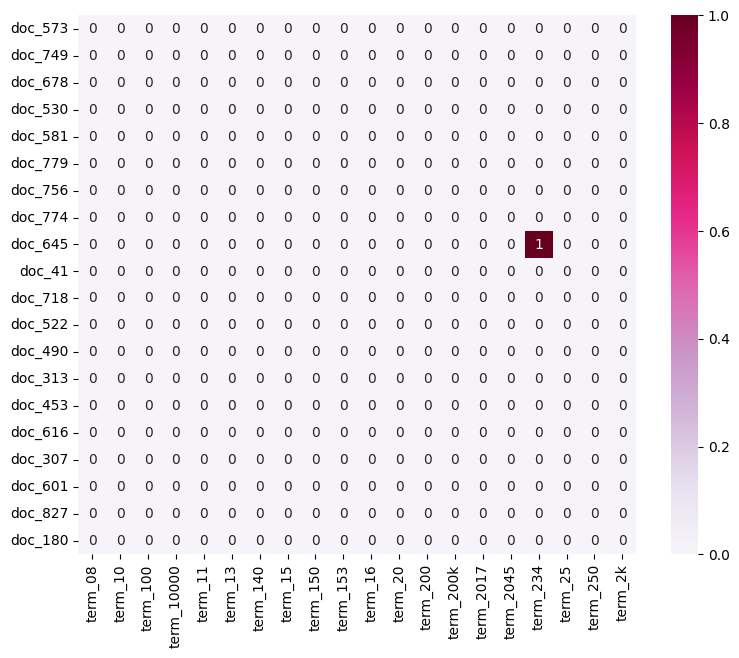

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

用Heatmap呈現每個詞彙出現在哪篇文章中

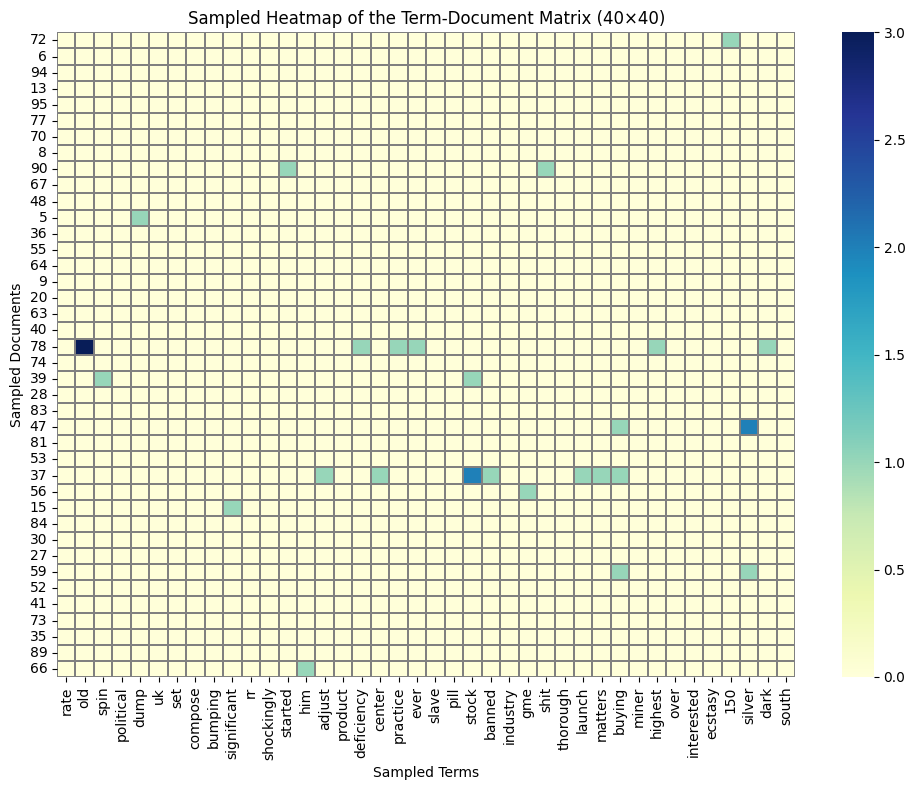

In [45]:
n_docs, n_terms = dtm_df.shape
rng = np.random.default_rng(42)

sample_docs = rng.choice(n_docs, size=min(40, n_docs), replace=False)
sample_terms = rng.choice(n_terms, size=min(40, n_terms), replace=False)
submatrix = dtm_df.iloc[sample_docs, sample_terms]

plt.figure(figsize=(10, 8))
sns.heatmap(submatrix,
            cmap='YlGnBu',
            cbar=True,
            linewidths=0.2,
            linecolor='grey')
plt.title("Sampled Heatmap of the Term-Document Matrix (40×40)")
plt.xlabel("Sampled Terms")
plt.ylabel("Sampled Documents")
plt.tight_layout()
plt.show()

計算每個詞彙出現的總次數

In [53]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)

[1 3 3 ... 1 2 2]


呈現每個詞彙出現的次數

In [55]:
term_times = pd.DataFrame({'term': count_vect.get_feature_names_out(), 'times': term_frequencies})
term_times = term_times.sort_values(by='times', ascending=False)


#### Visualize--Top N

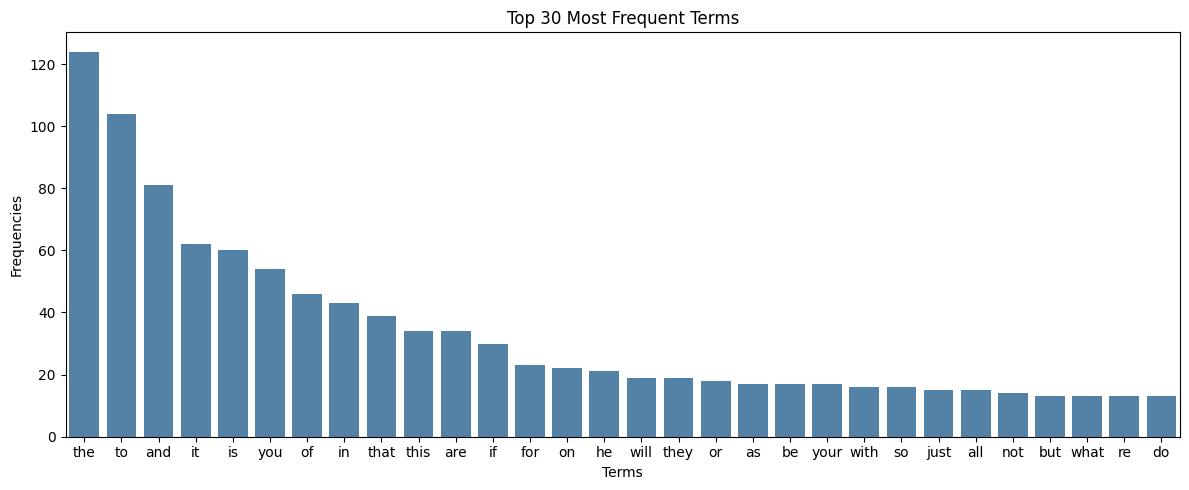

In [57]:
top_n = 30
plt.figure(figsize=(12, 5))
sns.barplot(data=term_times.head(top_n), x='term', y='times',color='steelblue')
plt.title(f'Top {top_n} Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.tight_layout()
plt.show()

#### Visualize - Log
如果前幾個詞太高、其他詞太小，可以對 times 取 log

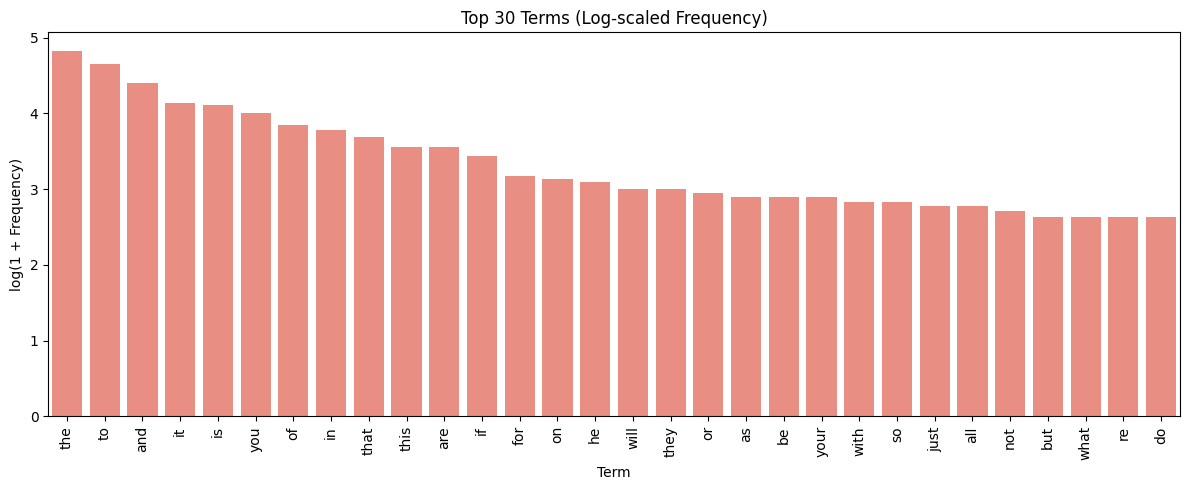

In [58]:
term_times['log_times'] = np.log1p(term_times['times'])

plt.figure(figsize=(12, 5))
sns.barplot(
    data=term_times.head(top_n),
    x='term', y='log_times',
    color='salmon'
)
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Terms (Log-scaled Frequency)")
plt.xlabel("Term")
plt.ylabel("log(1 + Frequency)")
plt.tight_layout()
plt.show()


# Phase 2

In [36]:
### Begin Assignment Here

In [41]:
categories_safe = df['category_name_safe'].unique() 

# 2. 創建 category_dfs 字典 (用於分組)
category_dfs = {cat: df[df['category_name_safe'] == cat] for cat in categories_safe}

In [40]:
import re

# 假設 X 是您的原始 DataFrame，且 'category_name' 是類別名稱欄位

# 函數：移除所有非字母、非數字、非底線的字符
def clean_category_name(name):
    # 確保是字串，然後移除所有不安全的字符，並替換為底線
    name = str(name).strip()
    name = re.sub(r'[^\w\s\.-]', '', name) # 移除除字母數字底線外的所有標點符號和特殊符號
    name = name.replace('.', '_')
    name = name.replace(' ', '_')
    return name

# 應用清理函數到類別欄位
df['category_name_safe'] = df['label'].apply(clean_category_name)

In [63]:
# 函數：清理文本內容 (可選，通常 CountVectorizer 會處理大部分問題，但特殊符號需要手動清除)
def clean_text_for_cp950(text):
    # 將文本轉換為字串
    text = str(text) 
    
    # [方法 A: 激進地移除所有非 ASCII 字元]
    # 這會丟失所有中文、日文、特殊拉丁文等
    # text = text.encode('ascii', 'ignore').decode('ascii') 
    
    # [方法 B: 嘗試用 UTF-8 解碼再重新編碼（更溫和，但可能無效）]
    # 這裡我們採取一種折衷方案：移除常見的非標準空格和符號
    text = text.replace('\xf3', ' ') # 移除非換行空格
    # 這裡的清理動作很大程度上依賴於你發現的錯誤字符 \xf3 是什麼
    
    # 由於我們只針對 cp950 錯誤，最安全的方法是讓 CountVectorizer 處理，
    # 並相信錯誤是來自**文件名稱**或**類別名稱**。
    return text

# X['text_cleaned'] = X['text'].apply(clean_text_for_cp950) 
# 在運行 CountVectorizer 時使用這個清理過的欄位

In [119]:
df['text_cleaned'] = df['text'].apply(clean_text_for_cp950)

In [120]:
print(df.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'text_cleaned'],
      dtype='object')


首先，要先進把df['text']轉換成Term Frequency Matrix，再將她轉換成PAMI 的Transaction data格式，

Q:Why 轉換成PAMI ?

A:因為后續處理FPGrowth、DecesionTree、Naive Bayes 都需要用PAMI格式進行

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def create_term_frequency_df(df):
    count_vect = CountVectorizer()#建立count_vect:讓他理解去學習切割句子、小寫的規則
    X_counts = count_vect.fit_transform(df['text_cleaned'])#fit是建立一個字典裏面有所有的詞彙，transform是用這些詞彙去建立Text Freauency表格
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(),columns = words)
    return term_document_df    

In [66]:
categories = df['category_name_safe'].unique()
# category_dfs = {key(鍵):value(值) for 元素 in 元素iteration} 建立一個辭典，只要知道category是甚麼就可以取出所有屬於這個category內容
category_dfs = { category : df[df['category_name_safe'] == category] for category in categories}
filt_term_document_dfs = {}
for category in categories:
    # 呼叫您定義的函數，傳入特定類別的子 DataFrame
    filt_term_document_dfs[category] = create_term_frequency_df(category_dfs[category])

* term_frequency 是單詞出現在文章多少次，表格中就會是多少，若今天是binary representation 才會是 有出現就標記1沒有出現就標記0

In [67]:
print(filt_term_document_dfs[0])

KeyError: 0

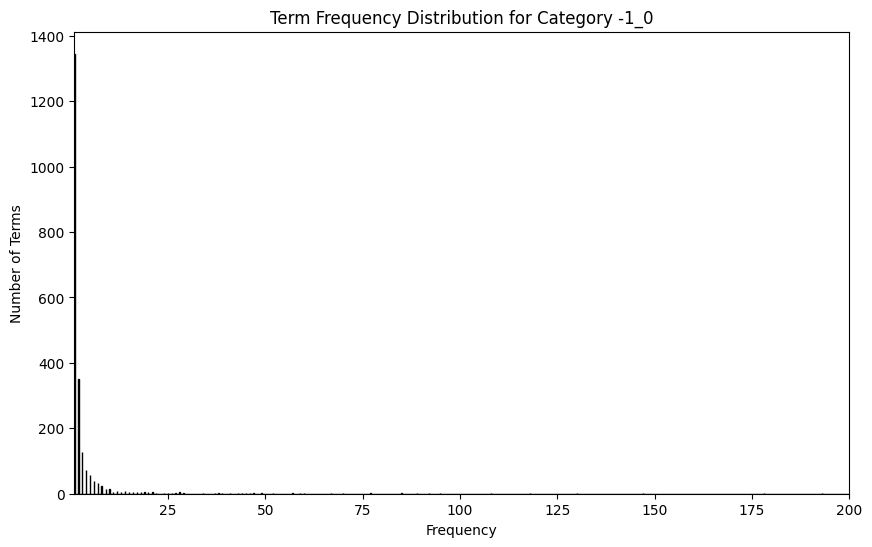

In [68]:
import matplotlib.pyplot as plt
# 試著畫出所有的詞彙出現的頻率，並且由高到低
category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
plt.figure(figsize=(10,6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

若今天想要獲取前5%的詞彙is what 做法
1. 把所有詞彙依照頻率進行排序，然後最反轉，讓他可以由大到小(descending order)
2. 計算出top5 是前幾名，用百分比和整體數量進行換算
3. 取出top5 是誰

#### sort and argsort note
首先是sort->numpy.sort(a, axis=-1, kind=None, order=None, *, stable=None)，傳入array(可以是多維)，然後axis玉社會是-1，代表沿著哪一個軸進行sorting，-1在numpy代表最後，所以若今天是二維的matrix，大致會像這樣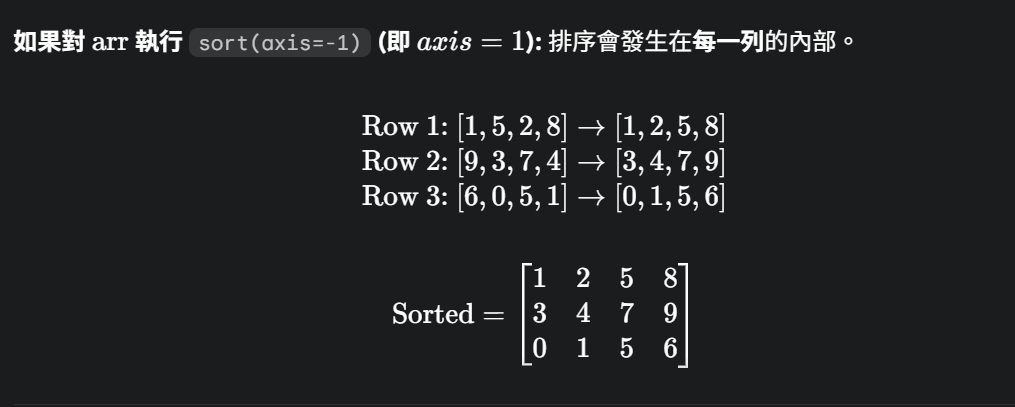
接著是argsort 和 sort 區別主要在於他會把回傳的是index值，而不是實際數值的值，EX:x[0] =10,x[1]=40,x[2]=30最後會回傳的會是1,2,0

In [69]:
category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
sort_indices = np.argsort(word_counts)[::-1]
sort_counts = np.sort(word_counts)[::-1]
total_num = len(sort_counts)
top_5_percent = int(total_num * 0.05)
# 這邊先取top5的index
top_5_index = sort_indices[:top_5_percent]
top5_word_term = [filt_term_document_dfs[categories[category_number]].iloc[:,i].name for i in top_5_index]


In [70]:
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_index}")
print(f"Filtered terms: {top5_word_term}")


Category: -1_0
Number of terms in top 5%: [1918 1956  137 1056 1060 1337  998 1917 1933  904 2139  774 2187  208
  158 1993 1925 2049 1349  163 1765 1322  114  901  369  302  899 1077
 2110 2123  977 2149 2098  173  932  318 1919   66 1367  680 1414 1141
 1312 1922 1276 1205 1261 1920 1929  930 1326  839 1256 1351 1554 1195
  961 2169  135  574 1376 1914  589 1372  790  626 2047 1895  306 1921
 2125  822  578 1378 1768 2132  581  213 1975  576  791 1683 1825 1354
 2135 1565 1950  146 1375  210 2164  843  184  129 1447  834 2093 2177
 1299 1714 1270 1264 2188 1219 1149  456  683  579 1924]
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'about', 'or', 'even', 'people', 'like', 'no', 'there', 'my', 'market', 'more', 'them', 'think', 'him', 'now', 'going', 'money',

若我今天想要特定某個詞彙出現在同個label中的總共次數

那下面loc[:'the']的意思會是，':'是指把所有row(列)都看過，然後找到colval = 'the'，最後用sum(axis=0)讓所有val沿著第一為的row相加(直向的相加)

In [71]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

np.int64(409)

In [72]:
filt_term_document_dfs[categories[category_number]].loc[:,'who'].sum(axis=0)

np.int64(17)

用和上面相似方法找出bottom 1 %

In [73]:
category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
sort_indices = np.argsort(word_counts)
sort_counts = np.sort(word_counts)
total_num = len(sort_counts)
bottom_percent = int(total_num * 0.01)
# 這邊先取top5的index
bottom_index = sort_indices[:bottom_percent]
bottom_word_term = [filt_term_document_dfs[categories[category_number]].iloc[:,i].name for i in bottom_index]


In [74]:
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {bottom_index}")
print(f"Filtered terms: {bottom_word_term}")

Category: -1_0
Number of terms in top 5%: [2190   49 1504   51   52   53   54   55   56 1505 1506   59   60   61
   62   48 2189   36   37   38   39]
Filtered terms: ['youtube', '500', 'program', '60', '65', '6k', '6th', '77', '7s', 'programs', 'projection', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']


我們希望可以刪去top_5以及bottom_1的資訊，因為那些資訊的價值比較不高

In [75]:
# 定義一個filiter可以濾出不需要的top_5 and bottom
def filter_top_bottom_words_by_sum(term_document_df,top_n_percent = 0.05,bottom_n_percent = 0.01):
    word_sums = term_document_df.sum(axis=0)
    # sort_values適用於Dataframe、Series，上面的sort()適用於python or numpy 的 list
    sorted_word = word_sums.sort_values()
    total_word = len(sorted_word)
    top_n_count = int(total_word*top_n_percent)
    bottom_n_count = int(total_word*bottom_n_percent)
    word_remove_index = pd.concat([sorted_word.head(bottom_n_count),sorted_word.tail(top_n_count)]).index
    print(f'Bottom {bottom_n_percent*100}% words: \n{sorted_word.head(bottom_n_count)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_n_percent*100}% words: \n{sorted_word.tail(top_n_count)}')
    return term_document_df.drop(columns = word_remove_index)
    
    

In [76]:
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category -1_0 we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category 0_0 we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14          1
14

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


上面drop很多詞彙基本上都是數值，分別出現在bottom_percentc會是 介係詞和只是代名詞出現在top_percent，所以filter出這些比較沒有實質意義的詞彙

In [77]:
    # [假設您已在新數據集上成功創建了 term_document_dfs 字典]
    
    from PAMI.extras.convert.DF2DB import DF2DB # 確保 DF2DB 被匯入
    
    # ----------------------------------------------------------------------
    # 2. 將 TDM 轉換為 PAMI 交易資料庫 (Transactional Database)
    # ----------------------------------------------------------------------
    
    # 假設這裡的 term_document_dfs 是新數據集的 TDM 字典
    for category in term_document_dfs:
        
        # 處理類別名稱中的特殊字符 (例如將 '.' 替換成 '_')
        category_safe = str(category).replace('.', '_')
        
        # *** 注意：這裡已修正為使用 DF2DB，而非 db.DenseFormatDF ***
        # 創建 DF2DB 物件，以您的 TDM 作為輸入
        obj = DF2DB(term_document_dfs[category])
        
        # 轉換並儲存為 CSV 檔案
        # 條件：保留詞彙出現次數 >= 1 的項目 (實現二值化)
        output_filename = f'td_freq_db_new_{category_safe}.csv' # 建議加上 'new' 區分新數據集
        obj.convert2TransactionalDatabase(output_filename, '>=', 1)
        
        # [可選，但有助於確認]
        # print(f"已生成檔案: {output_filename}")

下面出現的兩張圖篇分別是item frequency ->表示item出現的頻率，而transactoin length 是每筆transaction平均交易item


Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


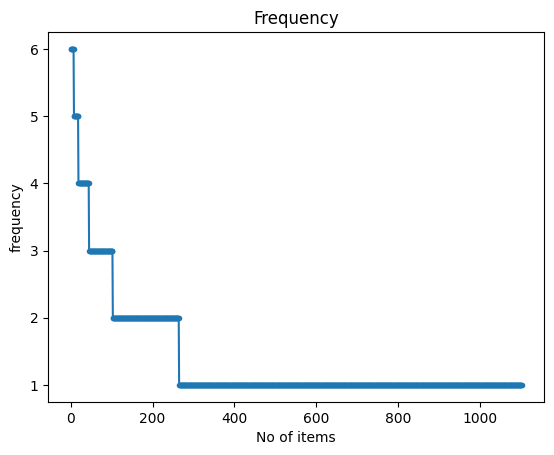

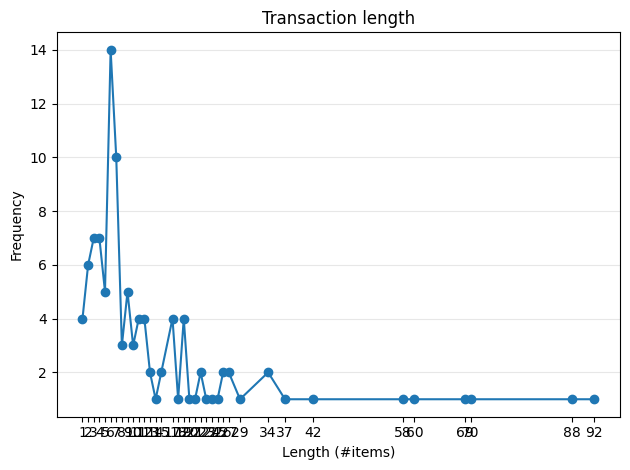

In [78]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_new_1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 417
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.764988009592326
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.265492673393037
Variance in Transaction Sizes : 334.4302135214905
Sparsity : 0.99583720494602


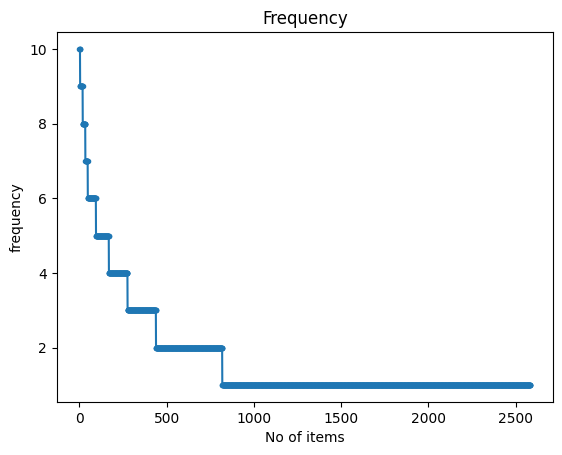

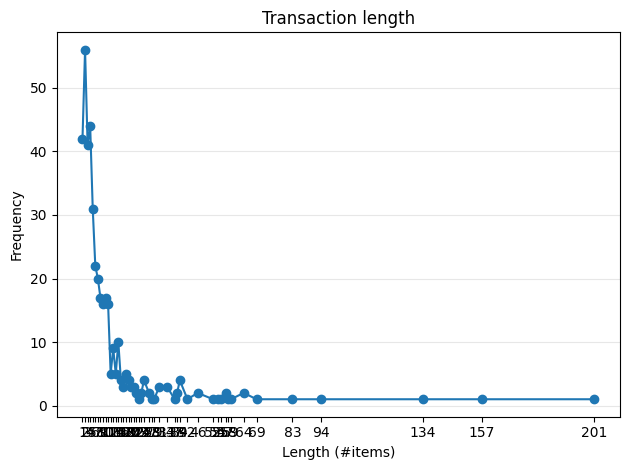

In [79]:
obj = tds.TransactionalDatabase('td_freq_db_new_0_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


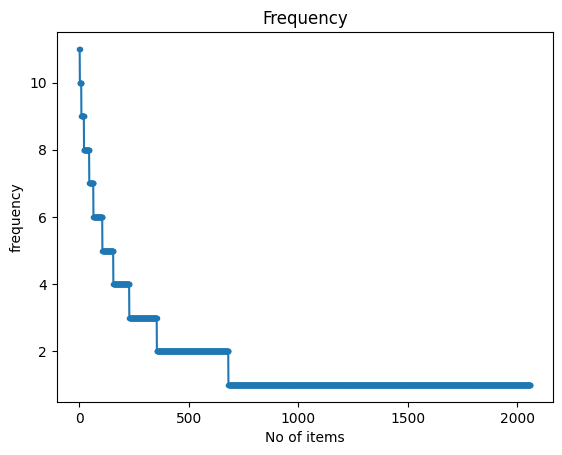

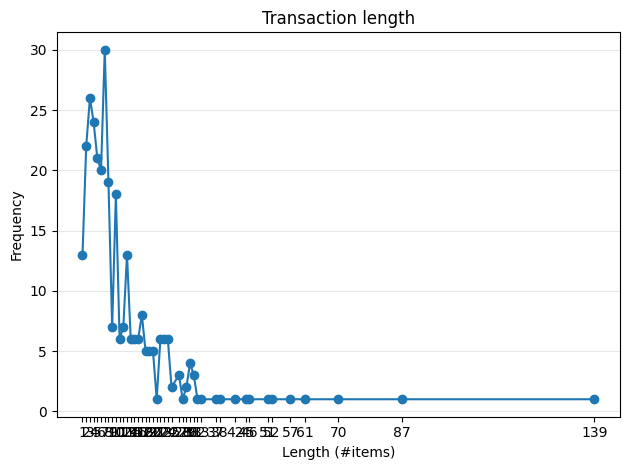

In [80]:
obj = tds.TransactionalDatabase('td_freq_db_new_-1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

上面圖表的重要性在於後續要實作FPGrowth 演算法會需要決定MinSup

決定MinSup是取決於有多少筆交易

### MinSup
1. 模式挖掘的原始目的：普及度 (Popularity)市場籃子類比： 頻繁模式挖掘最初用於分析超市銷售數據。交易 (Transaction) $=$ 一張收據 (Receipt)。模式 $=$ 一起購買的商品組合 (例如：牛奶和麵包)。目的： 企業想知道一個商品組合在多少顧客 (多少張收據) 中出現，而不是商品在單個顧客的購物籃中出現多少次。如果一個模式被 1000 筆收據購買，它就比被 10 筆收據購買的模式更有商業價值。結論： MinSup 必須衡量模式在整個群體中被接受和實踐的程度，所以它計算的是獨立的交易筆數。

2. 避免長文件的偏差 (Bias from Document Length)如果 MinSup 衡量總詞頻 (Total Term Count)：假設文件 A 有 10000 個詞，其中詞彙 $W$ 出現了 100 次。假設文件 B 有 10 個詞，其中詞彙 $W$ 出現了 10 次。問題： 兩個 $W$ 的計數都是 10 次，但文件 A 是單一文件的內部重複，文件 B 則代表 10 個獨立的事件。如果使用總詞頻，文件 A 會因為長度過長而扭曲模式的重要性。使用交易筆數：計算「包含模式的交易筆數」時，文件 A 雖然長，但也只貢獻 1 次計數。文件 B 也只貢獻 1 次計數。這確保了每個獨立的文檔/事件在支持度計算中具有相同的權重，不會因為文檔長度或內部詞彙的重複性而產生偏差。

3. 統計顯著性的標準模式的可靠性： 在統計學上，一個模式必須在足夠多的獨立樣本（即交易）中被觀察到，才能被視為一個可靠的、非偶然的模式。結論： MinSup 作為統計門檻，要求模式的支持度計數必須高到足以證明它不是由於隨機噪聲或單一幾筆異常交易所產生的。

In [107]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 3
obj1 = alg.FPGrowth(iFile='td_freq_db_new_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_db_new_1_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_db_new_1_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 110
Runtime: 0.002777099609375


In [101]:
obj1.save('freq_patterns_new_1_0_minSup4.txt') #save the patterns
frequentPatternsDF_db_new_1_0

,Patterns,Support
0,come,3
1,electric,3
2,electric\tyour,3
3,ll,3
4,main,3
...,...,...
105,them,6
106,out,6
107,see,6
108,economy,6


In [103]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 5
obj1 = alg.FPGrowth(iFile='td_freq_db_new_0_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_db_new_0_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_db_new_0_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2214
Runtime: 0.02072882652282715


In [105]:
###### from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 3
obj1 = alg.FPGrowth(iFile='td_freq_db_new_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_db_new_minus_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_db_new_minus_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 110
Runtime: 0.01824641227722168


In [108]:
print(df.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'category_name_safe',
       'text_cleaned'],
      dtype='object')


接下來整合所有不同label(category)出現的pattern次數，最後把只有出現1次的pattern刪除，得到final_pattern_df是紀錄出現哪些pattern並且出現在transaction的總次數

In [110]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_db_new_minus_0, frequentPatternsDF_db_new_1_0, frequentPatternsDF_db_new_0_0]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
#計算每個pattern，在所有category中出現次數
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
#filter出所有出現次數只有1的pattern
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
#計算每個category中出現的pattern(len(df))然後最後再相加全部
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    #這邊就是isin會return一串boolean stream然後若他在unique_patterns裡面就會回傳true，所以最後filered_df會儲存所有是unique_patterns的
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
# Merge filtered_dfs 原本會是一個list 裡面放4個category的pattern和他們support，接著用concate 並且ignore_index方式合併所有
# ignore_index是要不要照原本的index合併，設定成false會把所有原本他們index進行合併，在這邊若遇到相同index會出現錯誤
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                               Patterns  Support
2188                                               most       10
2187                                                let       10
2186                                                few        9
2185                                             weekly        9
2184                                             reddit        9
...                                                 ...      ...
24                                                bonds        5
25                                                  lot        5
26                                                  put        5
27                                                funds        5
1915  highlights\tbtcusd\tethusd\ttrends\tcharts\tco...        5

[2189 rows x 2 columns]
Number of patterns discarded: 245


In [123]:
X = df.copy()
print(X.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'text_cleaned'],
      dtype='object')


產生出增廣矩陣

In [124]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
#首先.str轉X['text']從Series變成str(因為.split只支援str切分)，.split()以空白為切分符號切分，最後apply(set)就是把所有轉換成set
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,however,haven,investing,paper,started,bonds,lot,put,funds,highlights\tbtcusd\tethusd\ttrends\tcharts\tcoinbase\tjasmyusd\tprices
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
print(augmented_df.shape)
print(pattern_matrix.shape)

(847, 6535)
(847, 2189)


利用top-k選出前幾出現頻率高的pattern

In [126]:
# Answer Here
# top-k algo
from PAMI.frequentPattern.topk import FAE as alg
import pandas as pd
import time
import numpy as np # 確保 numpy 已經匯入

# 修正 'minSup' 欄位名稱為 'k_value' 以符合 FAE Top-K 語義
result = pd.DataFrame(columns=['algorithm', 'k_value', 'patterns', 'runtime', 'memory']) 
algorithm = 'FAE'
k_values = [50,100,150]
seperator = '\t' 

for k_value in k_values:
    # 這裡假設您的檔案確實是 Tab 分隔的
    obj = alg.FAE('td_freq_db_new_1_0.csv', k=k_value, sep=seperator) 
    
    start_time = time.time()
    obj.mine()
    runtime = time.time() - start_time
    
    # 確保 obj.getMemoryRSS() 能在您的 PAMI 版本中正確運行，否則可能導致延遲。
    memory_usage = obj.getMemoryRSS() 
    
    # store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, k_value, len(obj.getPatterns()), runtime, memory_usage]

print("\n--- FAE Top-K 演算法運行完成 ---")
print(result)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.

--- FAE Top-K 演算法運行完成 ---
  algorithm  k_value  patterns   runtime     memory
0       FAE       50        50  0.048745  269426688
1       FAE      100       100  0.039858  270106624
2       FAE      150       150  0.065660  271622144


用MAXFPGrowth

In [132]:
import PAMI.extras.dbStats.TransactionalDatabase as stats
import PAMI.extras.graph.plotLineGraphFromDictionary as plt
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd
inputFile = 'td_freq_db_new_1_0.csv'
#把csv裡面的資料都用\t分開，最後存成TransactionalDatabase裡面的obj
obj = stats.TransactionalDatabase('td_freq_db_new_1_0.csv',sep='\t')
#執行所有必需的內部計算（讀取檔案、計算大小、稀疏性、長度等）
obj.run()
minimumSupportCountList = [3,6,9]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    #
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [133]:
print(result)

     algorithm  minSup  patterns   runtime     memory
0  MaxFPGrowth       3        98  0.014006  156127232
1  MaxFPGrowth       6         8  0.000000  156127232
2  MaxFPGrowth       9         0  0.000000  156127232


<Axes: xlabel='minSup'>

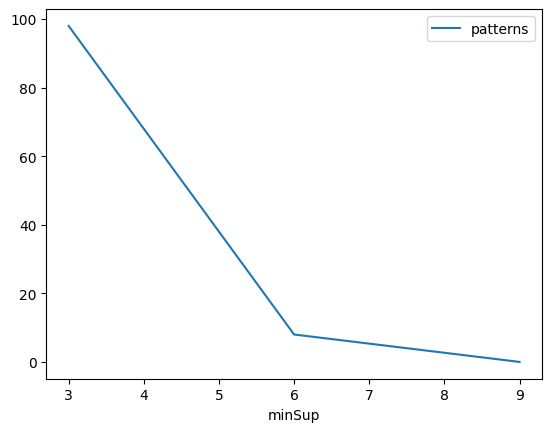

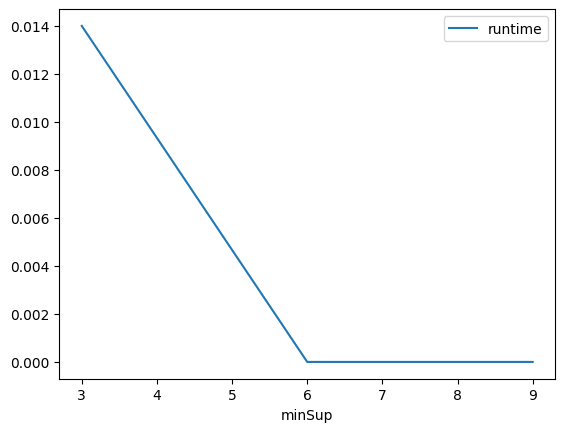

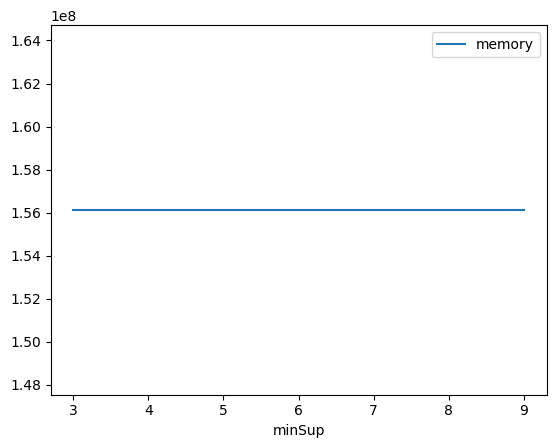

In [134]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib

### 5.5 Dimensionality Reduction

若Data有太過多的Dimension也不好，會難以Visualize 並且看出他們的關聯性，所以對於
線性的Data->PCA
非線性的Data->t-SNE、UMAP(t-SNE改良版)

In [135]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [136]:
X_pca_tdm.shape

(847, 2)

In [137]:
X_tsne_tdm.shape

(847, 2)

In [138]:
X_umap_tdm.shape

(847, 2)

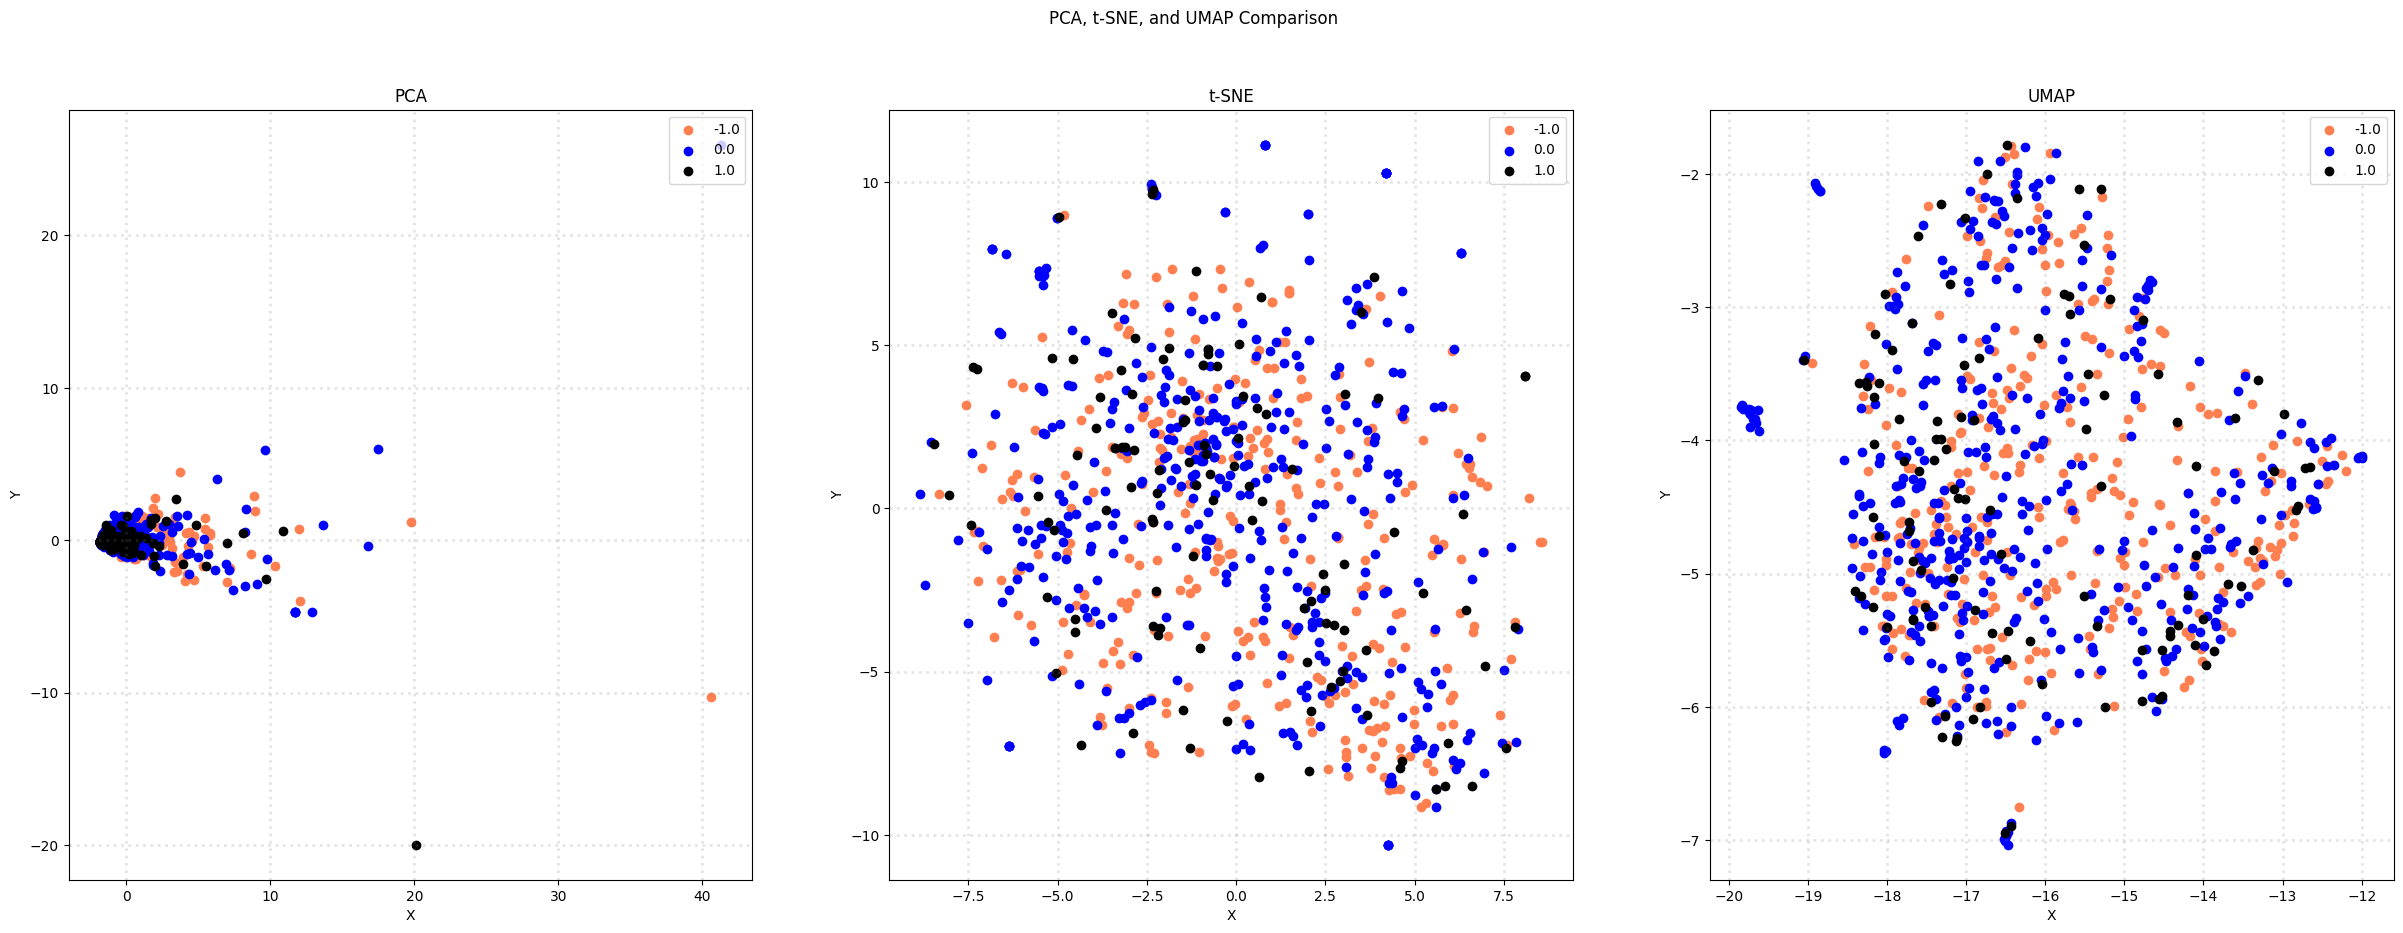

In [139]:
col = ['coral', 'blue', 'black']
categories = X['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['label'] == category].T[0]
        ys = X_reduced[X['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

上面Data的分布基本上都是黏在一起，這邊我們的輸入都是使用詞蘋也就是BoW去分析，但這樣的方法無法很好分類，因為缺乏考量單詞出現在這那他的前後文，所以後面要用TF-IDF進行改良

In [140]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

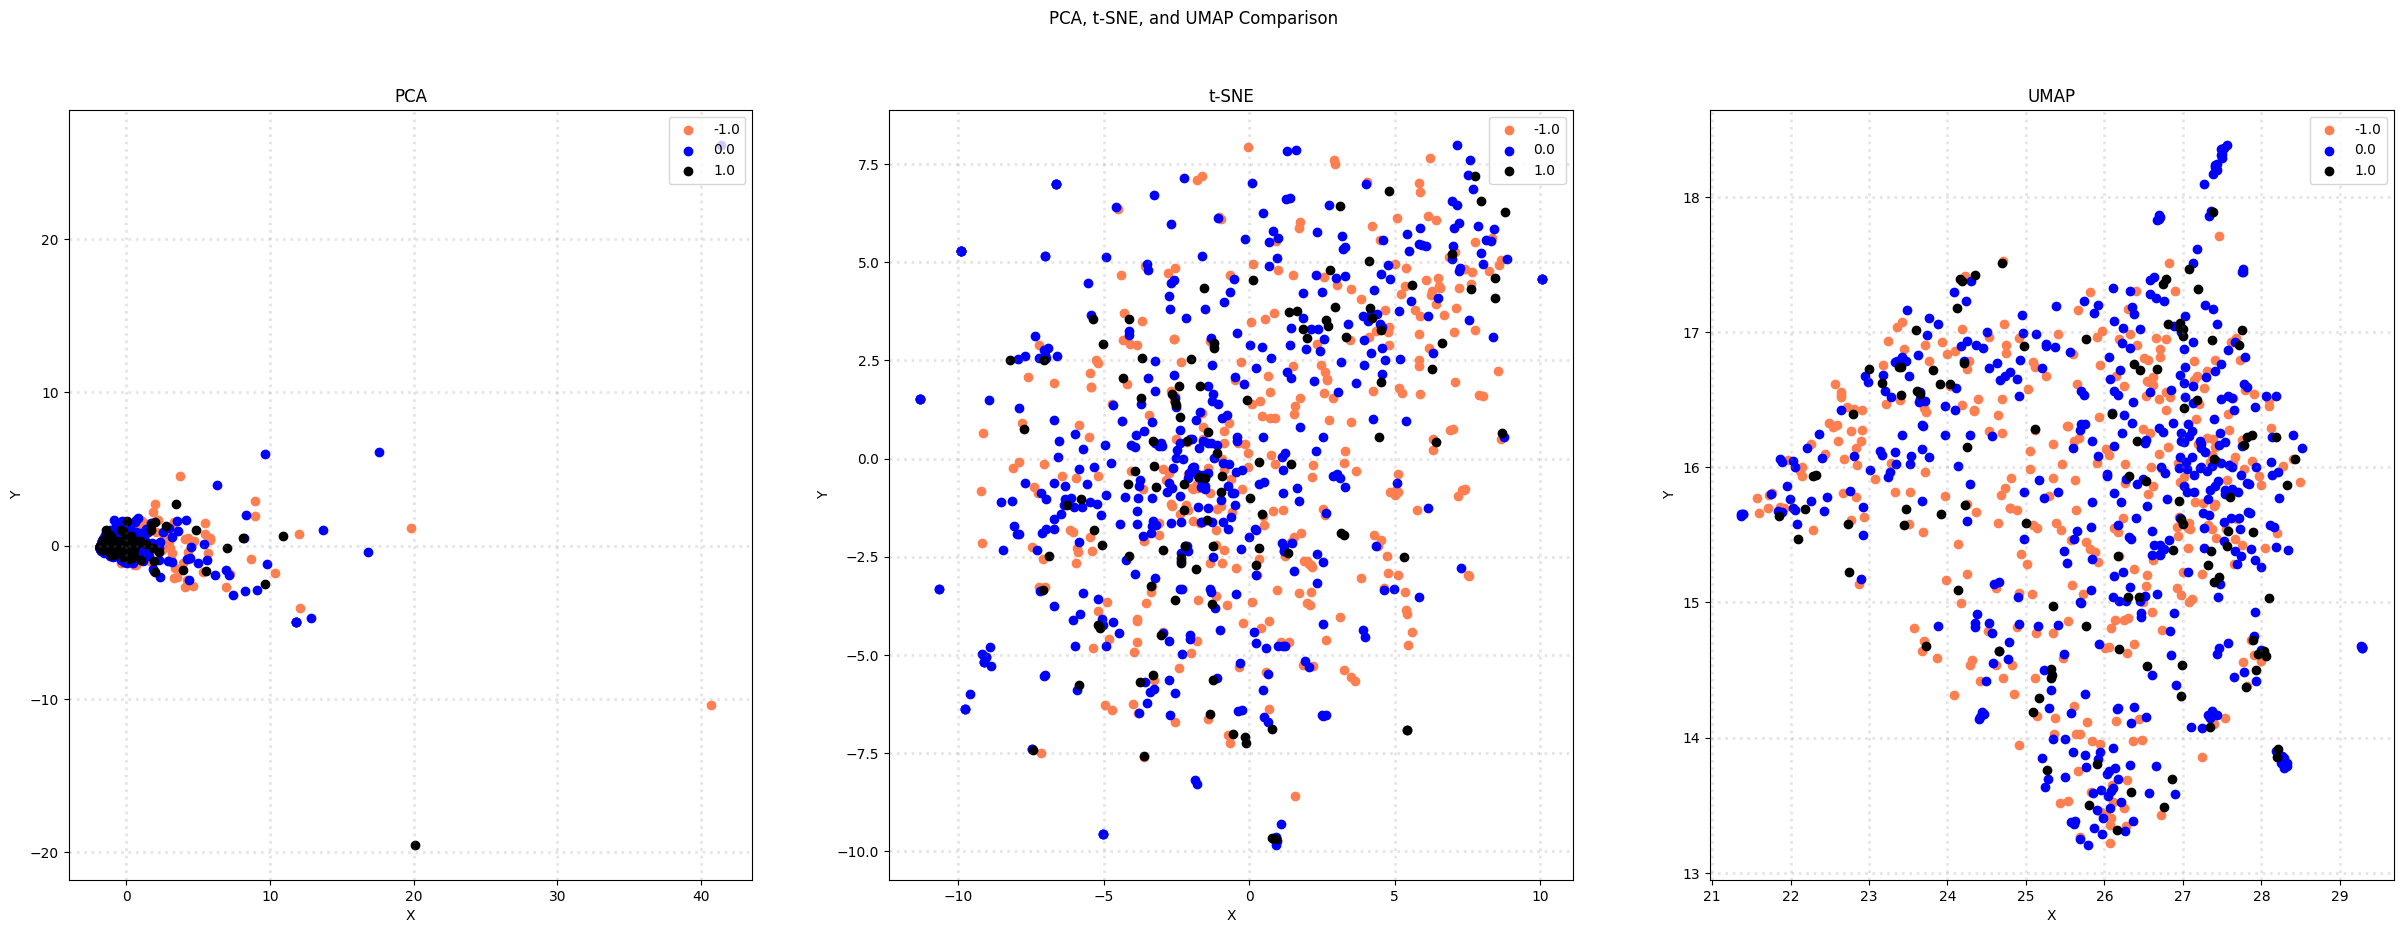

In [142]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = X['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['label'] == category].T[0]
        ys = X_reduced[X['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

PCA、t-SNE、UMAP都是用於幫助我們更加視覺化，而不是幫助機器型分類

下面是將維度降到3維，繪製圖片

In [143]:
#Answer Here
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

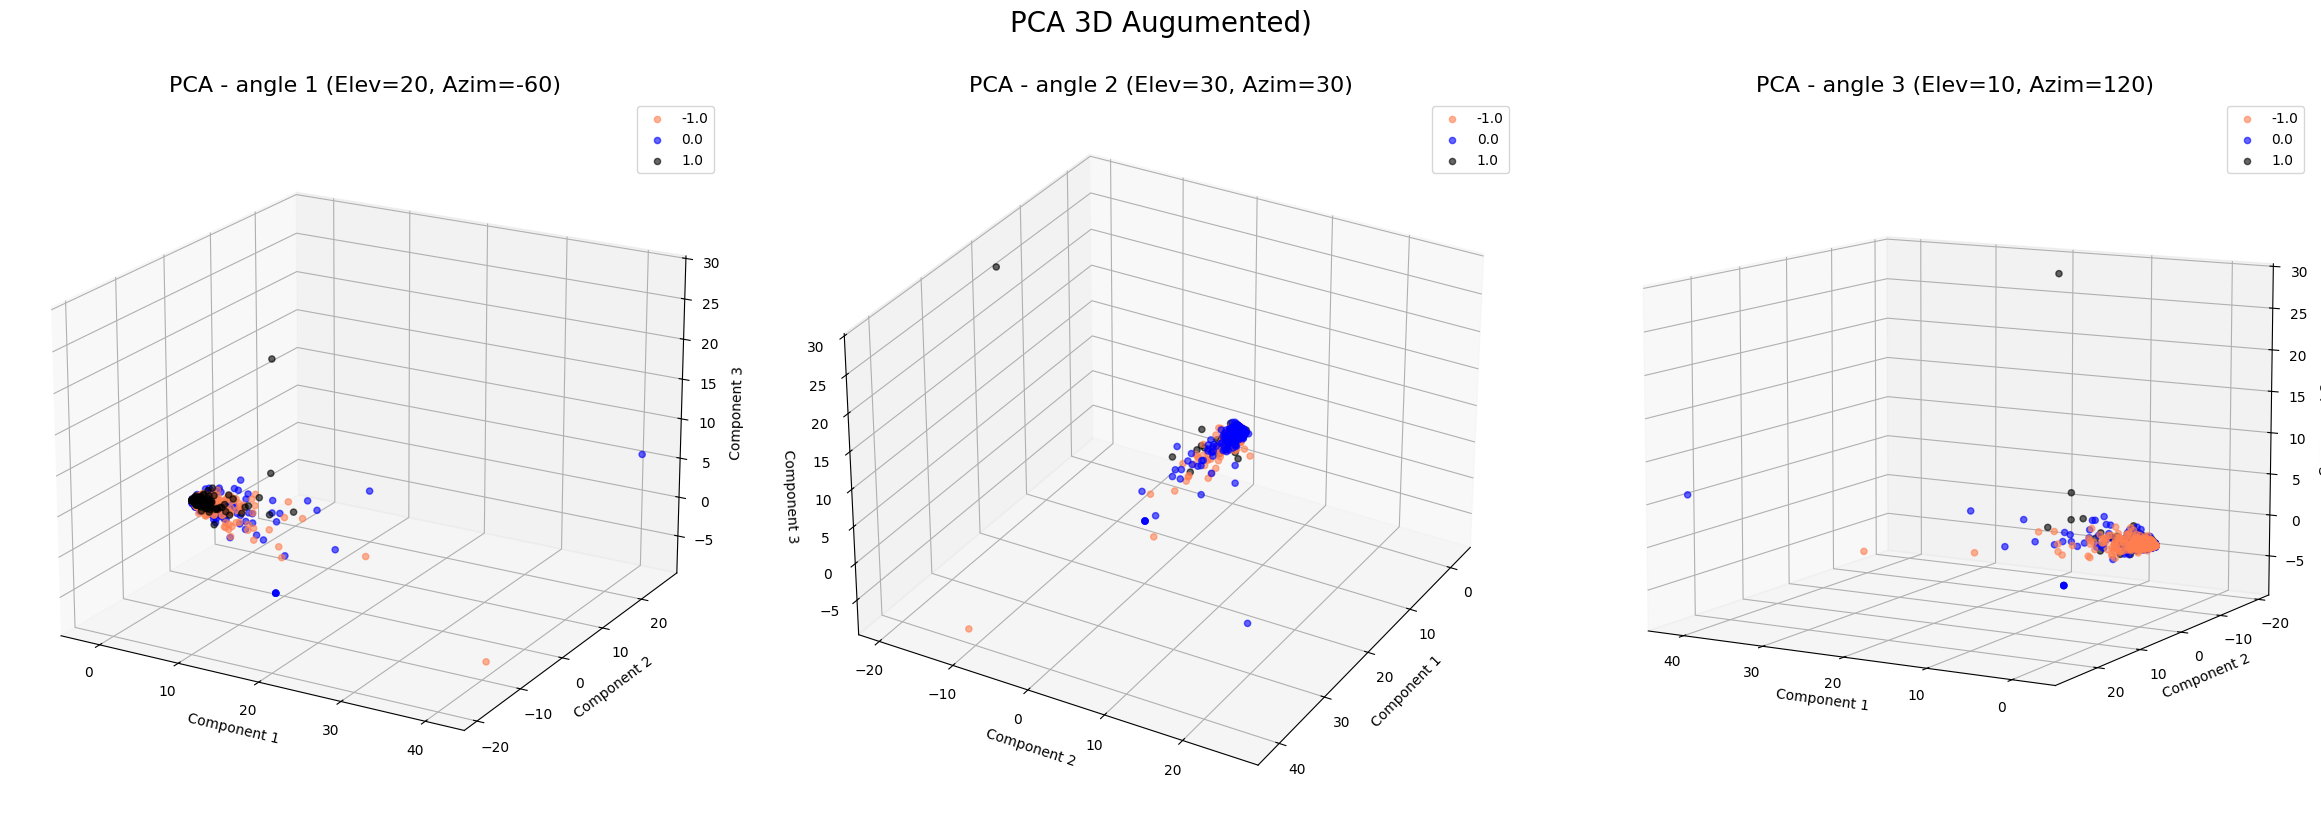

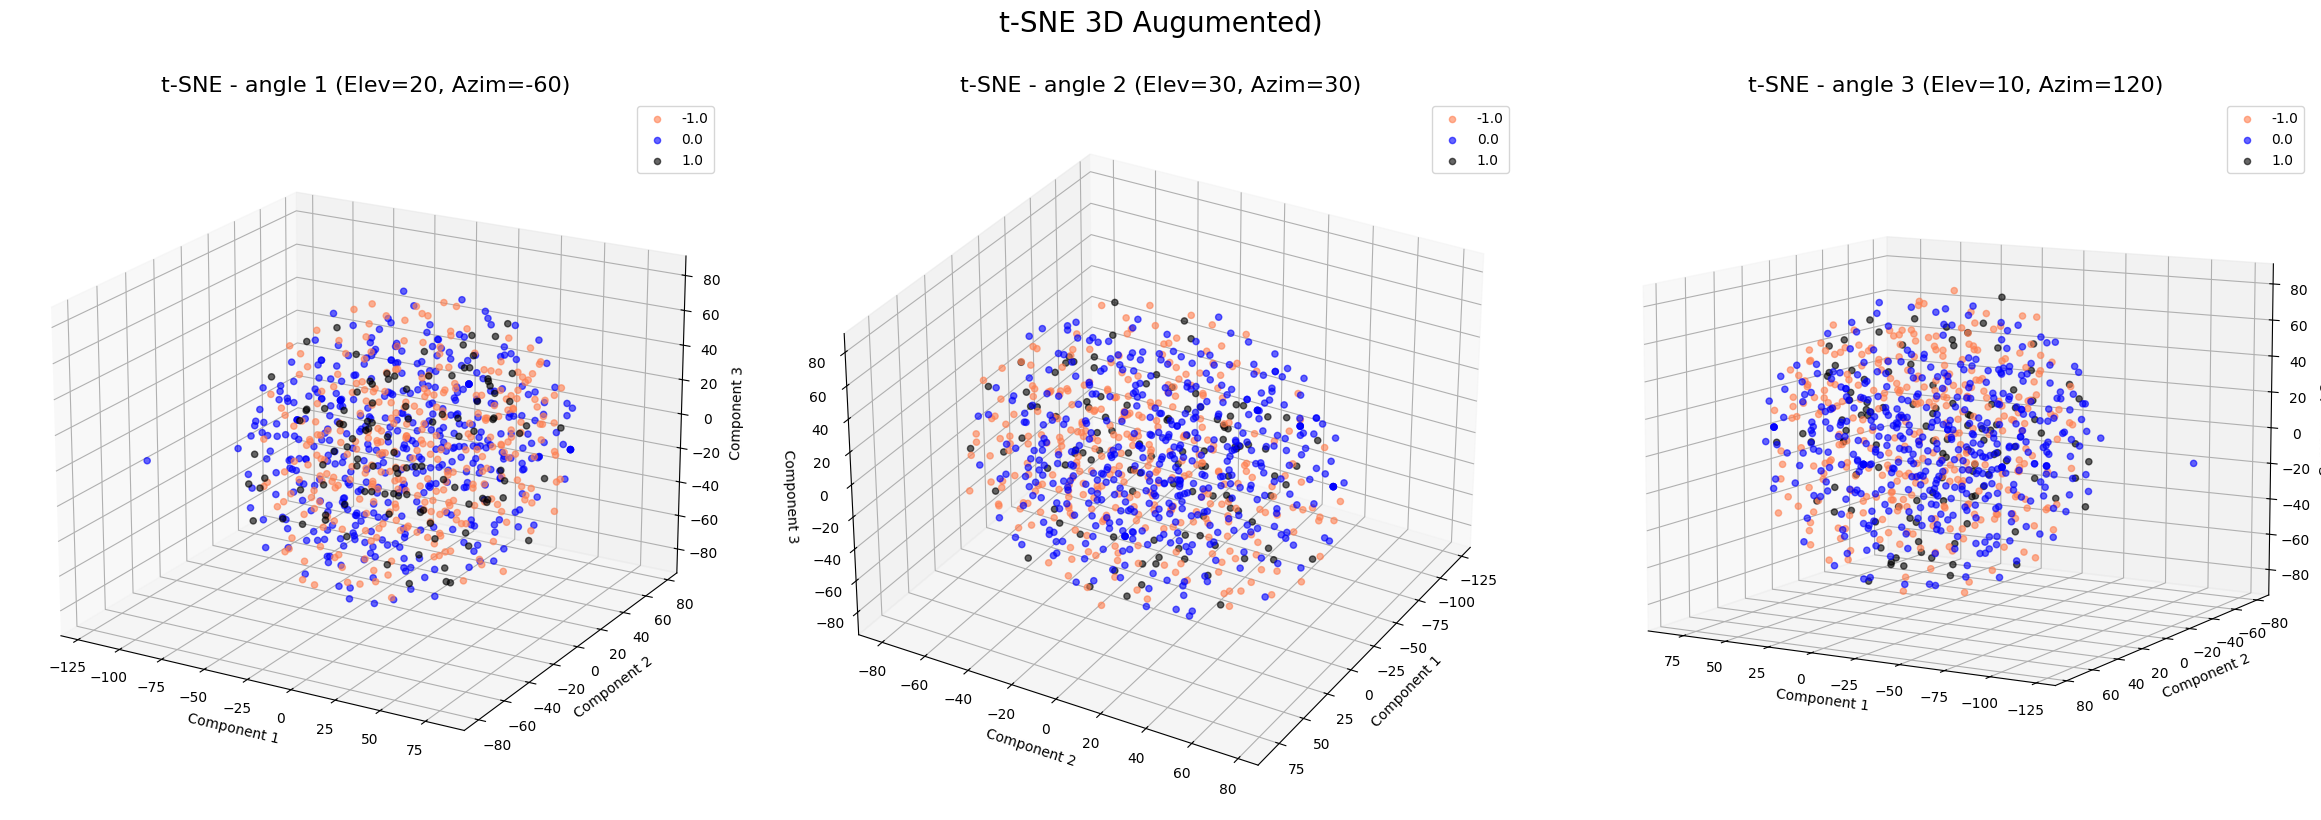

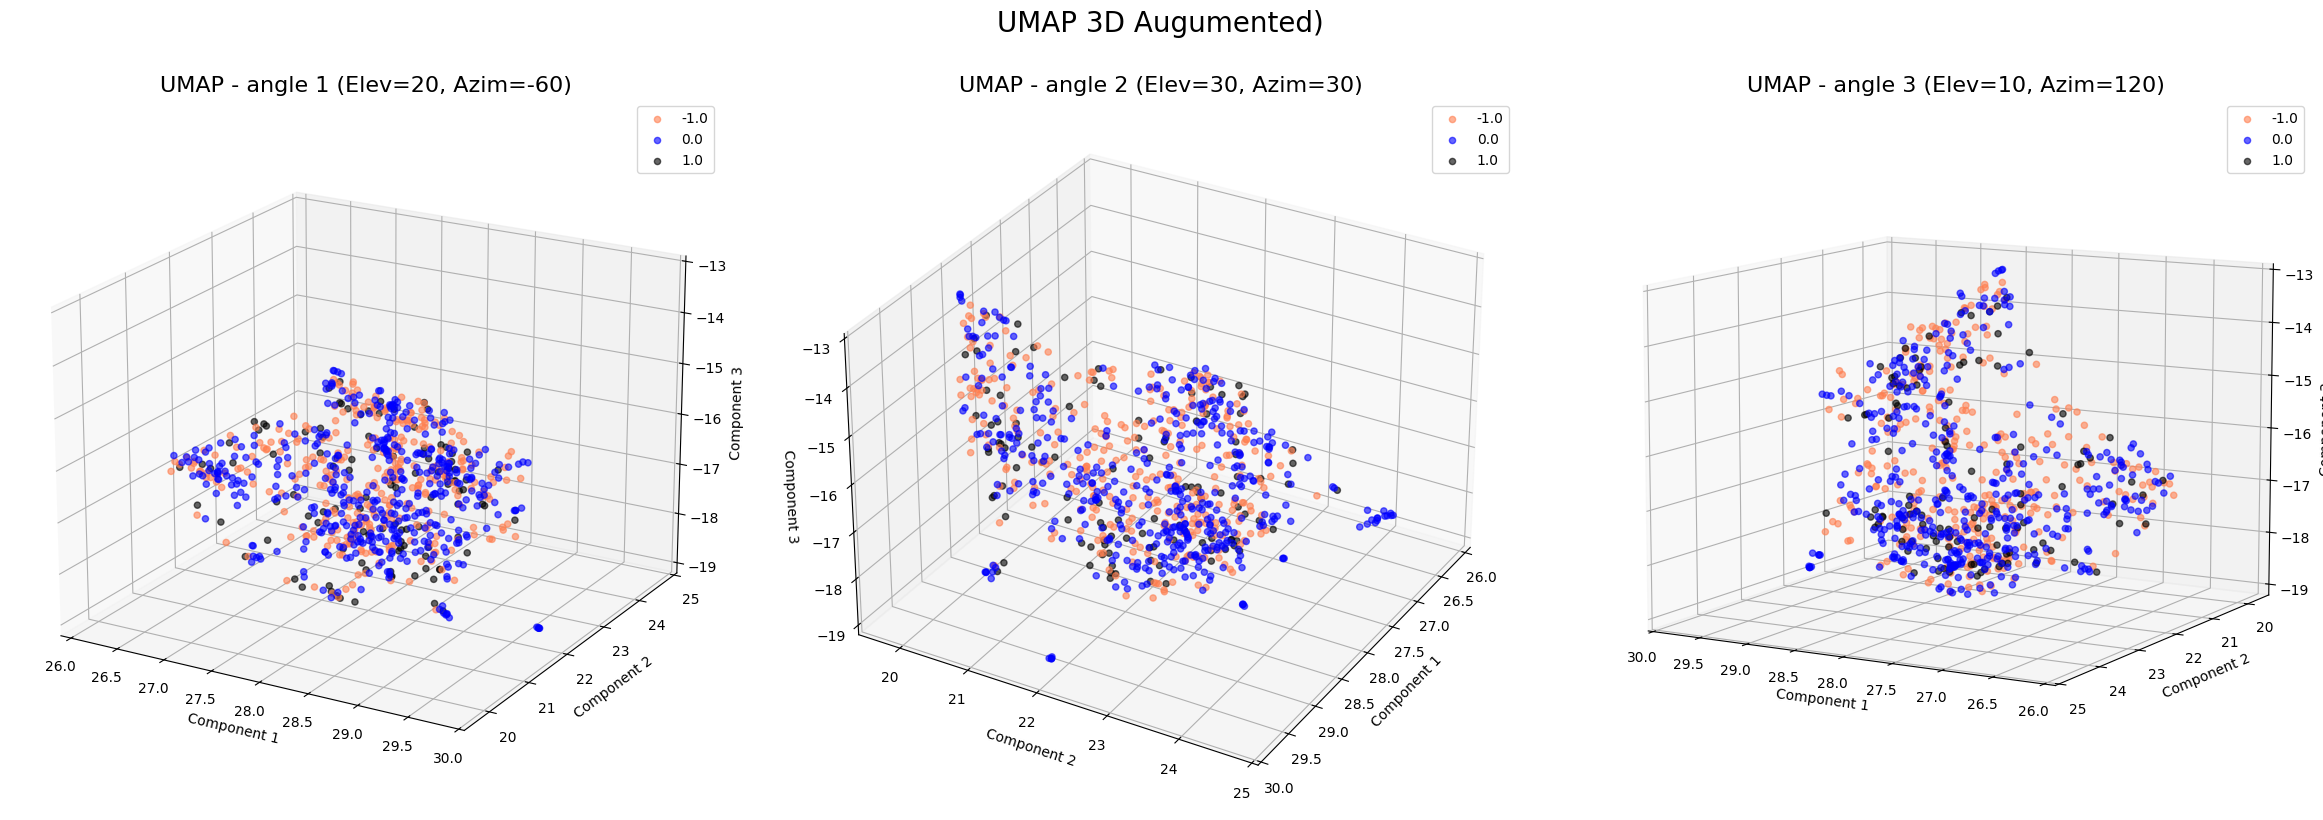

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black']
if 'X' not in locals(): # 避免重複定義
    num_samples = len(augmented_df) # 假設 augmented_df 已經生成
    # 模擬 category_name
    X = pd.DataFrame({'lebel': np.random.choice(['category_A', 'category_B', 'category_C'], num_samples)})
    X.index = augmented_df.index # 確保索引匹配
    
categories = X['label'].unique()


# --- 繪圖函數 ---
def plot_3d_scatter(ax, X_reduced, title, elev_azim):
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    
    # 設定相機視角
    ax.view_init(elev=elev_azim[0], azim=elev_azim[1]) # elev (仰角), azim (方位角)

    for c, category in zip(col, categories):
        # 篩選特定類別的點
        category_indices = X['label'] == category
        xs = X_reduced[category_indices, 0]
        ys = X_reduced[category_indices, 1]
        zs = X_reduced[category_indices, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, s=20, alpha=0.6) # s=點大小，alpha=透明度
    
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)


# --- 設定多個視角 ---
# 每個元組 (elev, azim) 代表一個視角：仰角和方位角
camera_angles = [
    (20, -60),  # 視角 1: 稍微從上方和左側看
    (30, 30),   # 視角 2: 較高角度從右前方看
    (10, 120)   # 視角 3: 較低角度從左後方看
]

# --- 為每個降維方法和每個視角繪圖 ---
methods = [
    (X_pca_aug, 'PCA'),
    (X_tsne_aug, 't-SNE'),
    (X_umap_aug, 'UMAP')
]

for X_reduced, method_name in methods:
    fig_method = plt.figure(figsize=(24, 8)) # 為每個方法創建一個圖形
    fig_method.suptitle(f'{method_name} 3D Augumented)', fontsize=20, y=1.02) # 總標題
    
    for i, angle in enumerate(camera_angles):
        ax = fig_method.add_subplot(1, len(camera_angles), i + 1, projection='3d')
        plot_3d_scatter(ax, X_reduced, f'{method_name} - angle {i+1} (Elev={angle[0]}, Azim={angle[1]})', angle)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # 調整佈局以容納標題
    plt.savefig(f'{method_name}_3D_Augmented_Comparison.png')
    plt.show()

上面圖片的PCA可以看到資料基本上看不出有甚麼分別、而t-SNE相較之下表現又比較好，但是一樣也沒有很具體的分別，最後是UMAP的部分相較前兩者可以稍微看出資料的分布

### 5.6 Discretization and Binarization

下面是把albel的部分轉換成one hot encoding

In [147]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [148]:
mlb = preprocessing.LabelBinarizer()

In [150]:
mlb.fit(X.label)

,neg_label,0
,pos_label,1
,sparse_output,False


In [151]:
X['bin_label'] = mlb.transform(X['label']).tolist()

In [152]:
X[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,text_cleaned,tokenized_text,bin_label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,Calls on retards,"{on, Calls, retards}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Stunt as in like why did they even make a big ...,"{ever, like, even, the, why, ever., it, make, ...","[0, 1, 0]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,Seeing lots of red in the ticker.,"{ticker., in, red, the, Seeing, lots, of}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,Vision Marine Technologies Inc. is rewriting t...,"{speed;, for, it's, watercraft., watercraft, c...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,He didn’t say thank you.,"{He, thank, say, you., didn’t}","[1, 0, 0]"
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"Hoping to ejaculate in wet warm puss tonight, ...","{tonight,, in, luck, wish, wet, to, me, ejacul...","[0, 1, 0]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,Trump will respond to china increasing their t...,"{even, looking, JPow, i, to, the, if, weeks, I...","[1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,Confirmed not a trap. Its been like this for p...,"{for, mouth, like, 2, by, word, it, Confirmed,...","[0, 1, 0]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,Am I the only one seeing the cup & handle brea...,"{only, Thursday., the, to, technicals, held, b...","[0, 0, 1]"


## 6. Data Exploration
試著找出你的data在dataset中的關係

In [154]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[0]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [155]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Calls on retards']


In [156]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
# 這邊會統計col是詞彙的集合，然後最後輸出會是個1D矩陣，代表出現詞彙的次數
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
# 而這邊是Binary就是進行統計每個詞彙是否會出現有出現就是1沒有出現在這個docs就是0
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


用Similarity的方式比較區別，若完全相同的話Similarity會是1反之是0

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
# 這邊是以cosin方式記錄，兩者之間的相似度
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\lala9\AppData\Local\Temp\ipykernel_2572\1317395353.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\lala9\AppData\Local\Temp\ipykernel_2572\1317395353.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\lala9\AppData\Local\Temp\ipykernel_2572\1317395353.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this oper

## 7. Data Classification

- **Multinomial Naive Bayes:** 接下來使用這個方式將Data進行分類，Naive Bayes 特別適合文本的詞頻分類，而成立前提是假設每個feature都是獨立的，接著我們會比較使用原始資料與上面的Binarization會出現甚麼區別

In [174]:
print(X.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'text_cleaned',
       'tokenized_text', 'bin_label', 'category', 'category_name'],
      dtype='object')


In [162]:
# 由於原始數據沒有 'category' 數值欄位，我們基於 'label' 創建它
# 這將把字串標籤（label）轉換成 0, 1, 2, 3... 的數值 ID
X['category'] = X['label'].astype('category').cat.codes

# 為了統一欄位名稱，我們將 'label' 複製為 'category_name'
X['category_name'] = X['label']

In [163]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

下面是使用Naive  Bayes Classifier 分別應用在term frequency and augmented data 上面

Precision 是被預測為每一類他的正確率，EX:若有1000個被預測為-1，那他的這些裡面實際真的是-1的有137，則Precision = 0.137     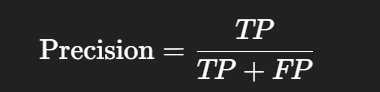
Recall 是總共有500筆的Data是0而實際被預測為為0的只有40筆，那最後Recall就會是0.08，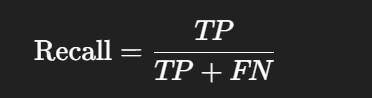

下面Macro avg 是針對每個類別的Precision作平均
然後Weighted avg 是會根據類別數量做加權(也就是會考慮每一個類別的數量)

In [167]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

          -1     0.5854    0.7347    0.6516        98
           0     0.6393    0.6446    0.6420       121
           1     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



In [173]:
# 1. Train the Naive Bayes classifier
ategory_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]


# --- 1. 資料分割 (使用 Augmented Data) ---
# X = augmented_df, Y = X['category']
X_train_aug, X_test_aug, y_train, y_test = train_test_split(
    augmented_df, 
    X['category'], 
    test_size=0.3, 
    random_state=42 # 保持與基線模型相同的隨機種子
)

# --- 2. 訓練 Multinomial Naive Bayes 分類器 ---
nb_classifier_aug = MultinomialNB()
# 使用增廣數據進行訓練
nb_classifier_aug.fit(X_train_aug, y_train)

# --- 3. 進行預測與評估 ---
y_pred_aug = nb_classifier_aug.predict(X_test_aug)
target_names = ["-1","0","1"]
print("--- 增廣模型 (Augmented Model with Unique Patterns) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_aug))
print("\nClassification Report:\n", classification_report(
    y_test, 
    y_pred_aug, 
    target_names=target_names, 
    digits=4
))

--- 增廣模型 (Augmented Model with Unique Patterns) ---
Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

          -1     0.5806    0.7347    0.6486        98
           0     0.6400    0.6612    0.6504       121
           1     0.0000    0.0000    0.0000        36

    accuracy                         0.5961       255
   macro avg     0.4069    0.4653    0.4330       255
weighted avg     0.5268    0.5961    0.5579       255



從整體來看加入pattern-based 後整體accuracy只有略微提升，而在label是1，會發現它整體的數值反而比沒有加入還要糟，這代表當出現極度的類別不平衡時，加入增廣矩陣的效益可能不大

使用Decision Tree 分別對term-frequency data and augmented data

In [175]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
# 這邊X['category']可以視為正確ans，所以下次希望給你一整行的data可以predict這屬於which category
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

          -1     0.4878    0.4082    0.4444        98
           0     0.5294    0.6694    0.5912       121
           1     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



In [177]:
#Answer
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_dt_aug = dt_classifier.predict(X_test_aug)
print("Decision Tree Accuracy use augmentd (TDM):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

Decision Tree Accuracy use augmentd (TDM): 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

          -1     0.5000    0.4388    0.4674        98
           0     0.5329    0.6694    0.5934       121
           1     0.2353    0.1111    0.1509        36

    accuracy                         0.5020       255
   macro avg     0.4227    0.4064    0.4039       255
weighted avg     0.4782    0.5020    0.4825       255



上面可以看到使用Naive Bayes  整體表現是優於 Decision Tree 的，因為TDM 符合稀疏+頻率型特徵+高維 
所以適合用Naive Bayes ，而Decision Tree 會很容易陷入overfitting